# Latihan KNN 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

### Load Dataset

In [ ]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Visualisasi dan Analisis Data

In [ ]:
df = pd.read_csv('glass.csv')
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

array([[<AxesSubplot:title={'center':'Na'}>]], dtype=object)

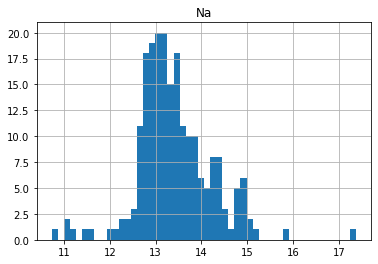

In [ ]:
df.hist(column='Na', bins=50)

### Feature set

In [ ]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
X = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']] .values  #.astype(float)
X[0:5]

array([[1.52101e+00, 1.36400e+01, 4.49000e+00, 1.10000e+00, 7.17800e+01,
        6.00000e-02, 8.75000e+00, 0.00000e+00, 0.00000e+00],
       [1.51761e+00, 1.38900e+01, 3.60000e+00, 1.36000e+00, 7.27300e+01,
        4.80000e-01, 7.83000e+00, 0.00000e+00, 0.00000e+00],
       [1.51618e+00, 1.35300e+01, 3.55000e+00, 1.54000e+00, 7.29900e+01,
        3.90000e-01, 7.78000e+00, 0.00000e+00, 0.00000e+00],
       [1.51766e+00, 1.32100e+01, 3.69000e+00, 1.29000e+00, 7.26100e+01,
        5.70000e-01, 8.22000e+00, 0.00000e+00, 0.00000e+00],
       [1.51742e+00, 1.32700e+01, 3.62000e+00, 1.24000e+00, 7.30800e+01,
        5.50000e-01, 8.07000e+00, 0.00000e+00, 0.00000e+00]])

In [ ]:
y = df['Type'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

### Normalisasi Data

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.87286765,  0.28495326,  1.25463857, -0.69244192, -1.12708201,
        -0.67170546, -0.14576634, -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, -0.17046023,  0.10231907,
        -0.02621325, -0.79373376, -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249,  0.19091171,  0.43878673,
        -0.16453301, -0.82894938, -0.35287683, -0.5864509 ],
       [-0.23283051, -0.24285268,  0.69870999, -0.31099376, -0.0529737 ,
         0.11210651, -0.51905192, -0.35287683, -0.5864509 ],
       [-0.31204471, -0.16920534,  0.65006624, -0.41137486,  0.55525631,
         0.08136879, -0.62469878, -0.35287683, -0.5864509 ]])

### Pembagian Data Training dan Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (171, 9) (171,)
Test set: (43, 9) (43,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### Training

In [ ]:
k = 4
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=4)

### Predicting

In [ ]:
yhat = knn.predict(X_test)
yhat[0:10]

array([1, 7, 2, 1, 1, 1, 5, 1, 2, 1], dtype=int64)

### Perhitungan Akurasi

In [ ]:
from sklearn import metrics

print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.7906976744186046


### Mencari Nilai Terbaik

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks))

for n in range(1,Ks+1):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train) #buat model
    yhat=neigh.predict(X_test) #memprediksi
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.86046512, 0.86046512, 0.81395349, 0.79069767, 0.72093023,
       0.79069767, 0.74418605, 0.79069767, 0.74418605, 0.74418605])

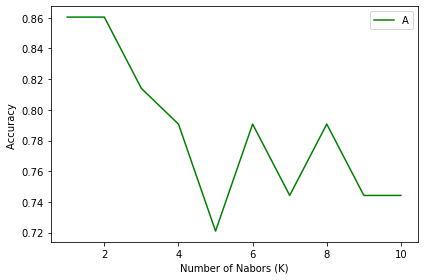

In [ ]:
plt.plot(range(1,Ks+1),mean_acc,'g')

plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.8604651162790697 with k= 1
